In [25]:
import json
import pandas as pd
import seaborn as sns
import numpy as np
import os
os.chdir('/home/camila/Development/EleccionesVenezuela2017/src/')
#os.chdir('/home/crangel/PycharmProjects/EleccionesVenezuela2017/src/')
from data_treatment import update_dataframe
%matplotlib inline


In [29]:
#"/home/crangel/PycharmProjects/EleccionesVenezuela2017/data/EDO_DELTA_AMACURO.json"
df_deltaA =pd.read_json("/home/camila/Development/EleccionesVenezuela2017/data/EDO_MERIDA.json",lines=True)
df_deltaA.columns

Index([u'ABSTENCION', u'ACTAS', u'ACTAS ESCRUTADAS', u'ACTAS VALIDAS',
       u'ALIRIO ARAQUE', u'ARQUIMIDES FAJARDO', u'CARLOS PAPARONI',
       u'CARLOS RAMOS', u'DANIEL GARCIA', u'ELECTORES ACTAS TRANSMITIDAS',
       u'ELECTORES INSCRITOS', u'JEHYSON GUZMAN', u'JESUS RONDON NUCETE',
       u'JORGE GAVIRIA', u'LAWRENCE CASTRO', u'LUIS ZEPPENFELDT',
       u'RAMON GUEVARA', u'VOTANTES ESCRUTADOS', u'VOTOS ESCRUTADOS',
       u'VOTOS NULOS', u'VOTOS VALIDOS', u'centro', u'estado', u'mesa',
       u'municipio', u'parroquia'],
      dtype='object')

In [30]:
#DELTA AMACURO
#df_out = update_dataframe(df_deltaA,'LIZETA HERNANDEZ','LARISSA GONZALEZ')

#MONAGAS
#df_out = update_dataframe(df_deltaA,'YELITZE SANTAELLA','GUILLERMO CALL')

#MERIDA
df_out = update_dataframe(df_deltaA,'JEHYSON GUZMAN','RAMON GUEVARA')

df_out.shape

(1044, 40)

Index([                    u'ABSTENCION',                          u'ACTAS',
                     u'ACTAS ESCRUTADAS',                  u'ACTAS VALIDAS',
                        u'ALIRIO ARAQUE',             u'ARQUIMIDES FAJARDO',
                      u'CARLOS PAPARONI',                   u'CARLOS RAMOS',
                        u'DANIEL GARCIA',   u'ELECTORES ACTAS TRANSMITIDAS',
                  u'ELECTORES INSCRITOS',                 u'JEHYSON GUZMAN',
                  u'JESUS RONDON NUCETE',                  u'JORGE GAVIRIA',
                      u'LAWRENCE CASTRO',               u'LUIS ZEPPENFELDT',
                        u'RAMON GUEVARA',            u'VOTANTES ESCRUTADOS',
                     u'VOTOS ESCRUTADOS',                    u'VOTOS NULOS',
                        u'VOTOS VALIDOS',                         u'centro',
                               u'estado',                           u'mesa',
                            u'municipio',                      u'parroquia',

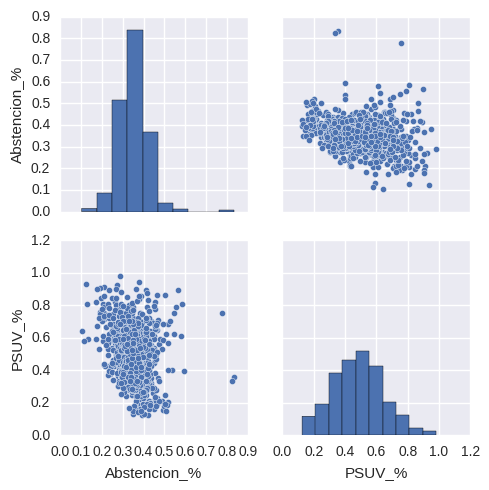

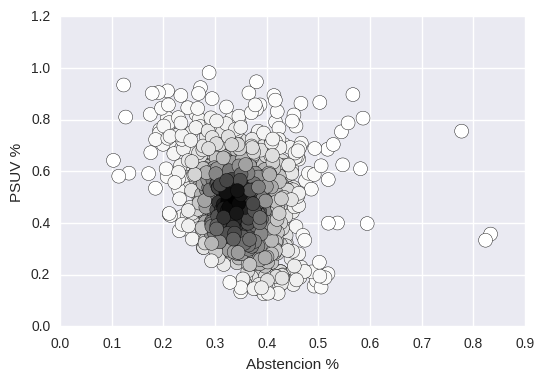

(-0.22929341244576082, 6.3835502895980452e-14)


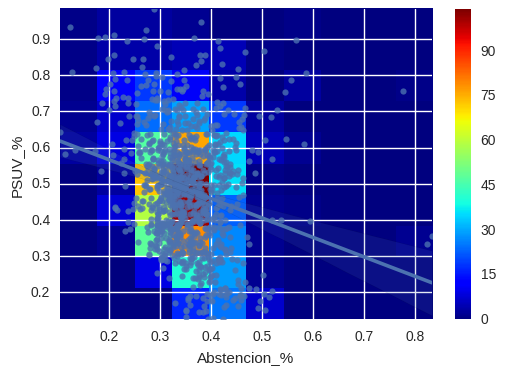

In [31]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde, pearsonr



print df_out.columns
df_out = df_out.dropna(axis=0)
sns.pairplot(df_out,vars=['Abstencion_%','PSUV_%']);

fig, ax = plt.subplots()
xy = np.vstack([df_out['Abstencion_%'], df_out['PSUV_%']])
z = gaussian_kde(xy)(xy)
ax.scatter(df_out['Abstencion_%'], df_out['PSUV_%'], c=z, s=100)
plt.xlabel('Abstencion %')
plt.ylabel('PSUV %')
plt.show()

plt.hist2d(df_out['Abstencion_%'],  df_out['PSUV_%'], (10, 10), cmap=plt.cm.jet)
plt.colorbar()

sns.regplot(x="Abstencion_%", y="PSUV_%", data=df_out);

print pearsonr(df_out["Abstencion_%"], df_out["PSUV_%"])


[u'CM. TEMBLADORUNIDAD EDUCATIVA LIBERTADOR BOLIVAR', u'PQ. ALTOS DE LOS GODOSESCUELA BASICA VICTORIA RAMIREZ MOLINOS', u'PQ. LAS COCUIZASCOMPLEJO EDUCATIVO NACIONAL LEONARDO INFANTE', u'PQ. SAN SIMONLICEO NACIONAL FRANCISCO ISNARDI', u'PQ. SAN SIMONLICEO NACIONAL IDELFONSO NUNEZ MARES', u'PQ. SAN SIMONLICEO NACIONAL MIGUEL JOSE SANZ', u'PQ. SAN SIMONUNIDAD EDUCATIVA PRIVADA CECILIO ACOSTA']


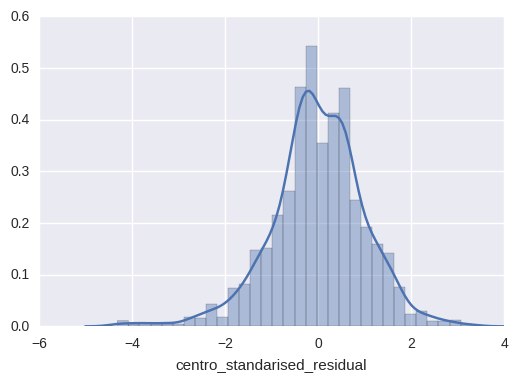

In [20]:
import math
sns.distplot((df_out[df_out['centro_standarised_residual']!=0]['centro_standarised_residual']),hist_kws={'weights':df_out[df_out['centro_standarised_residual']!=0]['VOTOS VALIDOS']})

list_centros = list(df_out[df_out['centro_standarised_residual']<-3]['centro'])

print list_centros





-0.80899817083981185

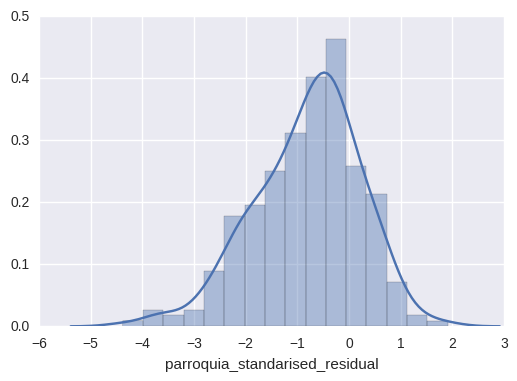

In [22]:
sns.distplot(df_out[df_out['centro_standarised_residual']==0]['parroquia_standarised_residual']);

df_out[df_out['centro_standarised_residual']==0]['parroquia_standarised_residual'].mean()

#sns.distplot(df_out['PSUV_%']);


-0.10022146901695311

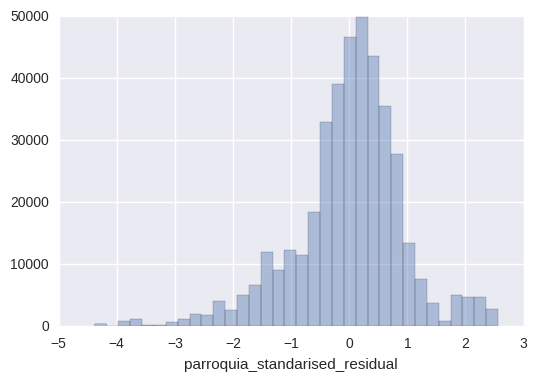

In [23]:
sns.distplot(df_out['parroquia_standarised_residual'],kde=False,hist_kws={'weights':df_out['VOTOS VALIDOS']});

list_centros = list(df_out[df_out['parroquia_standarised_residual']<2]['centro'])


df_out[df_out['centro']==list_centros[0]]

df_out[df_out['parroquia_standarised_residual']<0]['VOTOS VALIDOS'].sum()-df_out[df_out['parroquia_standarised_residual']>0]['VOTOS VALIDOS'].sum()

#df_out[df_out['parroquia_standarised_residual']<0]['VOTOS VALIDOS']-df_out[df_out['parroquia_standarised_residual']>0]['VOTOS VALIDOS']

df_out['parroquia_standarised_residual'].mean()

#df_out['parroquia_standarised_residual'].kurt()



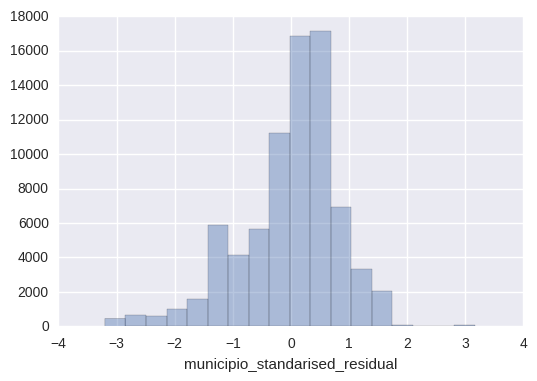

In [14]:
sns.distplot(df_out['municipio_standarised_residual'],kde=False,hist_kws={'weights':df_out['VOTOS VALIDOS']});


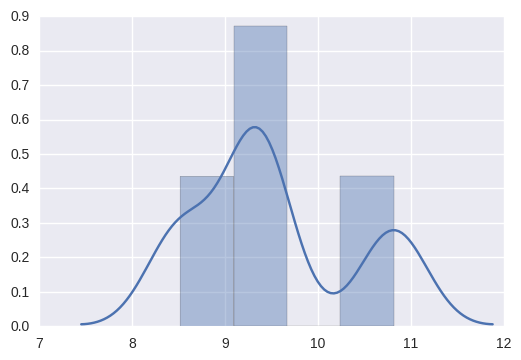

In [15]:
import math

list_centros = np.unique(df_out['municipio'])

rescaled_v = []
for i in list_centros:
    
    df = df_out[df_out['municipio']==i]
    
    rescaled_v.append(math.log(df['VOTOS VALIDOS'].sum()-df['PSUV_N'].sum()/float(df['PSUV_N'].sum())))
    
    
sns.distplot(np.array(rescaled_v));


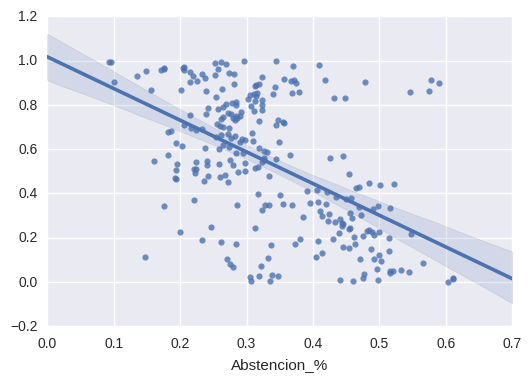

In [10]:
l = list(df_out.set_index('Abstencion_%').cumsum()['PSUV_N']/df_out['PSUV_N'].sum())
a = df_out['Abstencion_%']



sns.regplot(df_out['Abstencion_%'], np.array(l));

